### Posttest 7
Muhammad Syarafi Al Fasa 
(2109106099)

Link dataset : https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

#### Import Library

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil

Karena karakter pemisah pada class 'desert' berbeda dengan yang lain, maka kita normalisasikan dulu agar semua file memiliki pemisah yang sama yaitu tanda "_".

In [36]:
# Definisikan daftar nama kelas
class_names = ['cloudy', 'desert', 'green_area', 'water']

# Definisikan direktori sumber dan target
source_dir = 'satelite'
target_dir = 'normalized_satelite'

In [37]:
# Loop melalui setiap kelas
for class_name in class_names:
    # Cek apakah direktori target sudah ada atau belum
    target_class_dir = os.path.join(target_dir, class_name)
    if not os.path.exists(target_class_dir):
        os.makedirs(target_class_dir)
    
    # Loop melalui setiap file dalam direktori kelas
    for filename in os.listdir(os.path.join(source_dir, class_name)):
        source_file = os.path.join(source_dir, class_name, filename)
        
        # Ganti karakter khusus dalam nama file
        new_filename = filename.replace('(', '_').replace(')', '')
        target_file = os.path.join(target_class_dir, new_filename)
        
        # Salin file ke direktori target dengan nama baru
        shutil.copy(source_file, target_file)

print("File telah dinormalisasi.")

File telah dinormalisasi.


File yang telah dinormalisasi disimpan pada folder "normalized_satelite"

Disini kita akan melihat data berdasarkan class

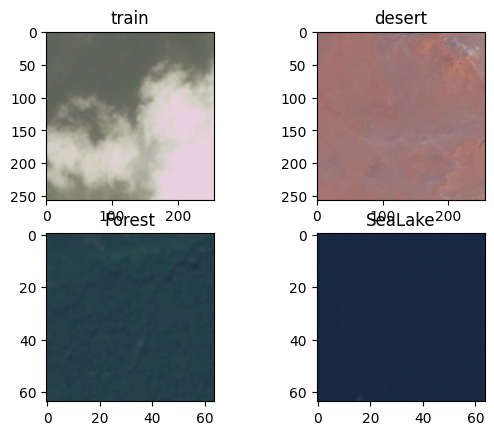

In [38]:
class_names = ['train', 'desert', 'Forest', 'SeaLake']

for i in range(4):
    paths = os.path.join('normalized_satelite', class_names[i], class_names[i] + '_1.jpg')
    
    if class_names[i] == 'train':
        cloudy = 'cloudy'
        paths = os.path.join('normalized_satelite', cloudy, class_names[i] + '_12.jpg')
    
    if class_names[i] == 'Forest':
        green_area = 'green_area'
        paths = os.path.join('normalized_satelite', green_area, class_names[i] + '_2.jpg')

    if class_names[i] == 'SeaLake':
        water = 'water'
        paths = os.path.join('normalized_satelite', water, class_names[i] + '_1.jpg')

    image = plt.imread(paths)
    
    # Membuat subplot dengan 2 baris dan 2 kolom
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.title(class_names[i])

# Menampilkan semua subplot setelah loop
plt.show()

Melakukan split dataset

In [47]:
# Mempersiapkan dataset dan membaginya menjadi train, val, dan test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split dataset menjadi train dan validation (80% train, 20% validation)
)

In [49]:
train_generator = train_datagen.flow_from_directory(
    'satelite',  # Ganti dengan path ke direktori dataset Anda
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Gunakan subset 'training' untuk data train
)

Found 4505 images belonging to 4 classes.


In [50]:
validation_generator = train_datagen.flow_from_directory(
    'satelite',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Gunakan subset 'validation' untuk data validation
)

Found 1126 images belonging to 4 classes.


Membuat model sequential

In [52]:
# Membangun model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Jumlah kelas Anda (misalnya, 4 kelas: cloudy, forest, dll.)


In [54]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Melakukan model fitting. Disini menggunakan callback EarlyStopping dimana val_loss akan dipantau jika tidak terjadi penurunan val_loss selama 5 epoch, maka training akan berhenti 

In [55]:
# Pelatihan model dengan callback EarlyStopping dan ModelCheckpoint
es = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=50, validation_data=validation_generator, validation_steps=len(validation_generator), callbacks=[es, mc])

Epoch 1/50
141/141 [==============================] - ETA: 0s - loss: 0.6239 - accuracy: 0.6888

c:\Users\Fasa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


141/141 [==============================] - 102s 712ms/step - loss: 0.6239 - accuracy: 0.6888 - val_loss: 0.4222 - val_accuracy: 0.8535
Epoch 2/50
141/141 [==============================] - 183s 1s/step - loss: 0.4042 - accuracy: 0.8346 - val_loss: 0.3539 - val_accuracy: 0.8135
Epoch 3/50
141/141 [==============================] - 248s 2s/step - loss: 0.3587 - accuracy: 0.8577 - val_loss: 0.3283 - val_accuracy: 0.8668
Epoch 4/50
141/141 [==============================] - 248s 2s/step - loss: 0.3384 - accuracy: 0.8622 - val_loss: 0.3054 - val_accuracy: 0.8934
Epoch 5/50
141/141 [==============================] - 190s 1s/step - loss: 0.3205 - accuracy: 0.8733 - val_loss: 0.3020 - val_accuracy: 0.8845
Epoch 6/50
141/141 [==============================] - 110s 779ms/step - loss: 0.2925 - accuracy: 0.8861 - val_loss: 0.2551 - val_accuracy: 0.8881
Epoch 7/50
141/141 [==============================] - 99s 703ms/step - loss: 0.2964 - accuracy: 0.8741 - val_loss: 0.2854 - val_accuracy: 0.8535
Ep

training berhenti pada epoch ke 32 dimana tidak terjadi penurunan val_loss sejak epoch ke 27

Melakukan evaluasi model

In [56]:
# Evaluasi model terhadap data test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('satelite', target_size=(150, 150), batch_size=32, class_mode='categorical')

test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 5631 images belonging to 4 classes.
176/176 [==============================] - 26s 148ms/step - loss: 0.1973 - accuracy: 0.9229
Test Loss: 0.19732977449893951
Test Accuracy: 0.922926664352417


Mmebuat grafik untuk loss dan val_loss serta accuracy dan val_accuracy

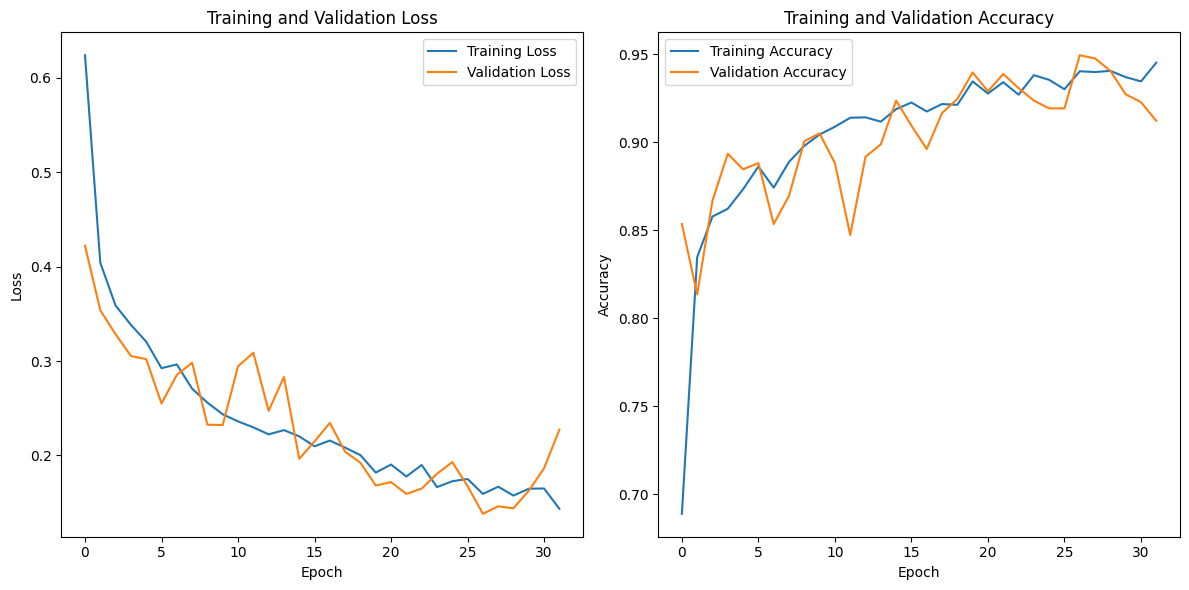

In [57]:
# Plot model loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot model accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Menyimpan model

In [58]:
model.save('model_posttest7.h5')